# **Digital Communication Systems Project: Implementation of LDPC Code**

### Seungmin Kim
### EECS 20224026
https://github.com/smin-k/Digital-Communication-Systems

https://drive.google.com/file/d/12fdg7anOlGf18RMnZ3Pqftbm412EmCSk/view?usp=sharing

### Import module and util function

In [1]:
#import module
import math
import requests
from io import BytesIO
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.special import erfc
from PIL import Image
from numba import jit, prange
from IPython.display import HTML

def show_array(array):
    html = '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            ''.join('<td style="background-color: yellow;"><b>{}</b></td>'.format(_) if _ != 0 else '<td>{}</td>'.format(_) for _ in row) for row in array
        )
    )

    display(HTML(html))

# **Mission 1**
### Evaluate the bit error probability of the IEEE standard 802.16e LDPC code  

## **1. Parity Check Matrix**

Choose a code rate **𝑅** and determine **the base matrix**

### **Base matrix list**

Took and used all the default matrices provided in **IEEE 802.16e.**


In [2]:
hb_matrix_12 = np.array([
    [-1,  94,  73,  -1,  -1,  -1,  -1,  -1,  55,  83,  -1,  -1,  7,    0,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1,  27,  -1,  -1,  -1,  22,  79,   9,  -1,  -1,  -1,  12,  -1,   0,   0,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1,  -1,  -1,  24,  22,  81,  -1,  33,  -1,  -1,  -1,   0,  -1,  -1,   0,   0,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
    [61,  -1,  47,  -1,  -1,  -1,  -1,  -1,  65,  25,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1,  -1,  39,  -1,  -1,  -1,  84,  -1,  -1,  41,  72,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1,  -1,  -1,  -1,  46,  40,  -1,  82,  -1,  -1,  -1,  79,   0,  -1,  -1,  -1,  -1,   0,   0,  -1,  -1,  -1,  -1,  -1],
    [-1,  -1,  95,  53,  -1,  -1,  -1,  -1,  -1,  14,  18,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1,  -1,  -1,  -1],
    [-1,  11,  73,  -1,  -1,  -1,   2,  -1,  -1,  47,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1,  -1,  -1],
    [12,  -1,  -1,  -1,  83,  24,  -1,  43,  -1,  -1,  -1,  51,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1,  -1],
    [-1,  -1,  -1,  -1,  -1,  94,  -1,  59,  -1,  -1,  70,  72,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1],
    [-1,  -1,   7,  65,  -1,  -1,  -1,  -1,  39,  49,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   0,   0],
    [43,  -1,  -1,  -1,  -1,  66,  -1,  41,  -1,  -1,  -1,  26,   7,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  0 ]
])

#23b
hb_matrix_23 = np.array([
    [ 2,  -1,  19,  -1,  47,  -1,  48,  -1,  36,  -1,  82,  -1,  47,  -1,  15,  -1,  95,   0,  -1,  -1,  -1,  -1,  -1,  -1],
    [-1,  69,  -1,  88,  -1,  33,  -1,   3,  -1,  16,  -1,  37,  -1,  40,  -1,  48,  -1,   0,   0,  -1,  -1,  -1,  -1,  -1],
    [10,  -1,  86,  -1,  62,  -1,  28,  -1,  85,  -1,  16,  -1,  34,  -1,  73,  -1,  -1,  -1,   0,   0,  -1,  -1,  -1,  -1],
    [-1,  28,  -1,  32,  -1,  81,  -1,  27,  -1,  88,  -1,   5,  -1,  56,  -1,  37,  -1,  -1,  -1,   0,   0,  -1,  -1,  -1],
    [23,  -1,  29,  -1,  15,  -1,  30,  -1,  66,  -1,  24,  -1,  50,  -1,  62,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1,  -1],
    [-1,  30,  -1,  65,  -1,  54,  -1,  14,  -1,   0,  -1,  30,  -1,  74,  -1,   0,  -1,  -1,  -1,  -1,  -1,   0,   0,  -1],
    [32,  -1,   0,  -1,  15,  -1,  56,  -1,  85,  -1,   5,  -1,   6,  -1,  52,  -1,   0,  -1,  -1,  -1,  -1,  -1,   0,   0],
    [-1,   0,  -1,  47,  -1,  13,  -1,  61,  -1,  84,  -1,  55,  -1,  78,  -1,  41,  95,  -1,  -1,  -1,  -1,  -1,  -1,   0]
])

#34a
hb_matrix_34 = np.array([
    [ 6,  38,   3,  93,  -1,  -1,  -1,  30,  70,  -1,  86,  -1,  37,  38,   4,  11,  -1,  46,  48,   0,  -1,  -1,  -1,  -1],
    [62,  94,  19,  84,  -1,  92,  78,  -1,  15,  -1,  -1,  92,  -1,  45,  24,  32,  30,  -1,  -1,   0,   0,  -1,  -1,  -1],
    [71,  -1,  55,  -1,  12,  66,  45,  79,  -1,  78,  -1,  -1,  10,  -1,  22,  55,  70,  82,  -1,  -1,   0,   0,  -1,  -1],
    [38,  61,  -1,  66,   9,  73,  47,  64,  -1,  39,  61,  43,  -1,  -1,  -1,  -1,  95,  32,   0,  -1,  -1,   0,   0,  -1],
    [-1,  -1,  -1,  -1,  32,  52,  55,  80,  95,  22,   6,  51,  24,  90,  44,  20,  -1,  -1,  -1,  -1,  -1,  -1,   0,   0],
    [-1,  63,  31,  88,  20,  -1,  -1,  -1,   6,  40,  56,  16,  71,  53,  -1,  -1,  27,  26,  48,  -1,  -1,  -1,  -1,   0]
])

hb_matrix_56 = np.array([
    [ 1, 25, 55, -1,  47,   4,  -1,  91,  84,   8,  86,  52,  82,  33,   5,   0,  36,  20,   4,  77,  80,   0,  -1,  -1],
    [-1,  6, -1, 36,  40,  47,  12,  79,  47,  -1,  41,  21,  12,  71,  14,  72,   0,  44,  49,   0,   0,   0,   0,  -1],
    [51, 81, 83,  4,  67,  -1,  21,  -1,  31,  24,  91,  61,  81,   9,  86,  78,  60,  88,  67,  15,  -1,  -1,   0,   0],
    [50, -1, 50, 15,  -1,  36,  13,  10,  11,  20,  53,  90,  29,  92,  57,  30,  84,  92,  11,  66,  80,  -1,  -1,   0]
])


### **Func get_base_matrix**

Input: **n** and **r**

Output: **z value** and **base matrix**

Get the** base matrix** matching the condition from the **H base matrix dictionary**.

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/base_matrix.png" />

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/z.png" />

In [3]:
hb_matrix_dic = { 1/2 : hb_matrix_12, 2/3 : hb_matrix_23 , 3/4 : hb_matrix_34, 5/6 : hb_matrix_56 }

def get_base_matrix(n,r):
    k = n * r
    z = int(n/24)

    b_matrix = hb_matrix_dic[r]
    return z, b_matrix

n= 576
r= 5/6
print("n:"+str(n)+", r:"+str(r))
print("z:"+str(get_base_matrix(n,r)[0]))
show_array(get_base_matrix(n,r)[1])

n:576, r:0.8333333333333334
z:24


1,25,55,-1,47,4,-1,91,84,8,86,52,82,33,5,0,36,20,4,77,80,0,-1,-1
-1,6,-1,36,40,47,12,79,47,-1,41,21,12,71,14,72,0,44,49,0,0,0,0,-1
51,81,83,4,67,-1,21,-1,31,24,91,61,81,9,86,78,60,88,67,15,-1,-1,0,0
50,-1,50,15,-1,36,13,10,11,20,53,90,29,92,57,30,84,92,11,66,80,-1,-1,0


### **Func get_sub_matrix**
Input: **z**, **value**(𝑝(𝑖,𝑗))

Output: **Submatrix**

Get submatrix 𝐏(𝑖,𝑗)


*   If 𝑝(𝑖,𝑗) ≥ 0, 𝐏(𝑖,𝑗)  is a permutation matrix with right shift of size 𝑝(𝑖,𝑗) .circular
*   If 𝑝(𝑖,𝑗) = −1, then 𝐏(𝑖,𝑗) = 𝟎 (zero matrix).


<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/sub_matrix.png" />

In [4]:
def get_sub_matrix(z, value):
    if value == -1:
        submatrix = np.zeros((z, z), dtype=np.float64)
    else:
        first_row = np.zeros(z, dtype=np.float64)
        first_row[value] = 1
        submatrix = np.array([np.roll(first_row, i) for i in range(z)], dtype=np.int32)
    return submatrix

z=24
value=16
print("z:"+str(z)+", value:"+str(value))
print("submatrix:")
show_array(get_sub_matrix(z, value))

z:24, value:16
submatrix:


0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Func get_h_matrix**

Input: **z**, **base matrix**

Output: **H matrix**

If z and b_matrix are input, a h-matrix matching the conditions is created.

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/h_matrix.png" />

In [5]:
def get_h_matrix(z, b_matrix):
    z_0 = 96  # 2304/24
    m, n = b_matrix.shape  # b_matrix의 크기
    h_matrix = np.zeros((m * z, n * z), dtype=np.float64)

    for i in range(m):
        for j in range(n):
            value = b_matrix[i, j]
            if value <= 0:
                sub_matrix = get_sub_matrix(z, value)
            else:
                #equation
                value = int((value * z) / z_0)

                sub_matrix = get_sub_matrix(z, value)
            h_matrix[i * z:(i + 1) * z, j * z:(j + 1) * z] = sub_matrix

    return h_matrix


n= 576
r= 5/6
z, b_matrix = get_base_matrix(n,r)
h = get_h_matrix(z, b_matrix)
print(z, b_matrix)
print(h.shape)

24 [[ 1 25 55 -1 47  4 -1 91 84  8 86 52 82 33  5  0 36 20  4 77 80  0 -1 -1]
 [-1  6 -1 36 40 47 12 79 47 -1 41 21 12 71 14 72  0 44 49  0  0  0  0 -1]
 [51 81 83  4 67 -1 21 -1 31 24 91 61 81  9 86 78 60 88 67 15 -1 -1  0  0]
 [50 -1 50 15 -1 36 13 10 11 20 53 90 29 92 57 30 84 92 11 66 80 -1 -1  0]]
(96, 576)


## **2. Data generation**
Generate an original information block of **𝑘 bits** arbitrarily.

In [6]:
def get_random_info(k):
    return np.random.randint(0, 2, k)

print(get_random_info(10))
print(get_random_info(10))

[0 0 0 1 1 0 1 0 0 1]
[1 1 1 1 1 1 0 1 0 1]


## **3. Encoding**

Encode the original data using the parity check matrix 𝐇 through the **efficient encoding procedure**.

### **Func divide_h_matrix**
Input: **H matrix**

Output: **A, B, T, C, D, E matrix**

Obtain the **submatrices** used for **efficient encoding**.

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/divid_h_matrix.png" />

In [7]:
@jit(nopython=True)
def divide_h_matrix(h_matrix):
    m, n = h_matrix.shape
    k = n - m
    z = int(n/24)

    a = np.ascontiguousarray(h_matrix[:(m-z), :k])
    b = np.ascontiguousarray(h_matrix[:(m-z), k:(k+z)])
    t = np.ascontiguousarray(h_matrix[:(m-z), -(m-z):])
    c = np.ascontiguousarray(h_matrix[(-z):, :k])
    d = np.ascontiguousarray(h_matrix[(-z):, k:(k+z)])
    e = np.ascontiguousarray(h_matrix[(-z):, -(m-z):])

    return a,b,t,c,d,e

n= 576
r= 1/2
z, b_matrix = get_base_matrix(n,r)
h = get_h_matrix(z, b_matrix)
a,b,t,c,d,e = divide_h_matrix(h)
print(h.shape[0],n/24,h.shape[1]-h.shape[0])
print("A",a.shape,"B",b.shape,"T",t.shape,"C",c.shape,"D",d.shape,"E",e.shape)

288 24.0 288
A (264, 288) B (264, 24) T (264, 264) C (24, 288) D (24, 24) E (24, 264)


### **Func encoding_data**(Efficient LDPC Encoding)
Input: **u, h_matrix**

Output: **encoded data**

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/Efficient_Encoding.PNG" />

**Verify using this formula**

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/Verf_Encoding.png" />


In [8]:
def encoding_data(u,h_matrix):
    u=u.astype(np.float64)
    A, B, T, C, D, E = divide_h_matrix(h_matrix)

    inv_T = inv(T)
    return jit_encoding_data(u,A, B, T, C, D, E,inv_T)

@jit(nopython=True)
def jit_encoding_data(u,A, B, T, C, D, E,inv_T):

    # Efficient LDPC Encoding
    ET_inv_A = E @ inv_T @ A
    p1_t = (ET_inv_A + C) @ u.T % 2

    BT_p1t = B @ p1_t
    AT_uT = A @ u.T
    p2_t = inv_T @ (AT_uT + BT_p1t) % 2

    p1 = p1_t.T
    p2 = p2_t.T

    encoded_data = np.concatenate((u, p1, p2))
    return encoded_data

n= 576
r= 1/2
z, b_matrix = get_base_matrix(n,r)
h = get_h_matrix(z, b_matrix)
A,B,T,C,D,E = divide_h_matrix(h)

u = get_random_info(int(n*r))
encoded_data = encoding_data(u,h)
print(encoded_data.shape)
#Verify
show_array((E @ inv(T) @ B + D) %2)

(576,)


1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **4. Modulation**
Modulate each **codeword block** by **BPSK modulation**



<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/Modulation.png" />

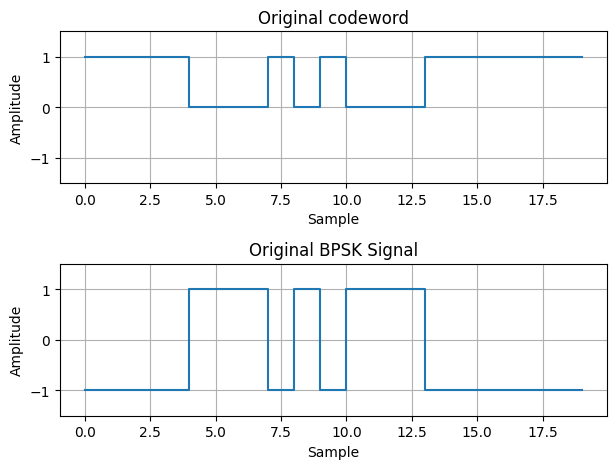

In [9]:
#Modulation: Modulate each codeword block by BPSK modulation.
# 0 -> -1 , 1 -> 1

def BPSK_modulation(input):
    return np.where(input == 0, 1, -1)

u = get_random_info(20)

plt.subplot(2, 1, 1)
plt.plot(u, drawstyle='steps-pre')
plt.title("Original codeword")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim(-1.5, 1.5)
plt.grid(True)

bpsk_signal = BPSK_modulation(u)

plt.subplot(2, 1, 2)
plt.plot(bpsk_signal, drawstyle='steps-pre')
plt.title("Original BPSK Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.tight_layout()
plt.show()


## **5. Transmission**
Transmit modulated symbols over the **AWGN channel** with the noise power spectral density **𝑁/2**.

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/AWGN.png" />

Convert **SNR_db** to **SNR**

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/snr.png" />

**Variance**

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/var.png" />




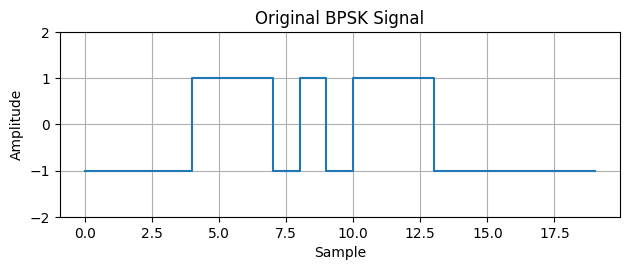

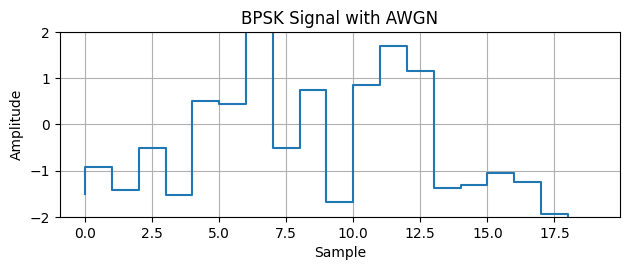

In [10]:
# Transmission: Transmit modulated symbols over
#the AWGN channel with the noise power spectral density 𝑁/2.

def add_awgn_noise(signal, noise_variance ):
    #generates an array of noise samples from a normal (Gaussian) distribution
    #with a mean of 0 and a standard deviation of the square root of noise_variance
    noise = np.random.normal(0, np.sqrt(noise_variance), signal.shape)
    return signal + noise

snr_db = 2
r= 1
#Convert **SNR_db** to **SNR**
snr = snr_linear = 10 ** (snr_db / 10)
#Variance
var = 1/2 * 1/r * 1/snr
signal_with_noise = add_awgn_noise(bpsk_signal,var)

#print signal
plt.subplot(2, 1, 2)
plt.plot(bpsk_signal, drawstyle='steps-pre')
plt.title("Original BPSK Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim(-2, 2)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(signal_with_noise, drawstyle='steps-pre')
plt.title("BPSK Signal with AWGN")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.ylim(-2, 2)
plt.grid(True)

plt.tight_layout()
plt.show()

## **6. Decoding**
Decode each received codeword by the iterative message passing algorithm



### **Func update_ctv** (Check node message update)

Input: **Variable node message**, **c**, **v**, **V(c)**

Output **Updated check node message**

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/check_meesage.png" />

In [11]:
@jit(nopython=True)
def update_ctv(vtc_message, c ,v, v_node_indexes):
    tmp = 1
    for i in v_node_indexes:
        if i == v:
            continue #ingnore
        tmp *=  np.tanh(vtc_message[i,c] * 1/2)

    tmp = np.log((1+tmp)/(1-tmp))
    return tmp

### **Func update_vtc** (Variable node message update)

Input: **Check node message**, **v**, **c**, **C(v)**

Output **Updated Variable node message**

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/variable_meesage.png" />

In [12]:
@jit(nopython=True)
def update_vtc(ctv_message, v, c, c_node_indexes):
    #get v_message
    tmp = 0
    for i in c_node_indexes:
        if i == c:
            continue #ingnore
        tmp += ctv_message[i,v]

    return tmp

### **Func update_LLR** (LLR update)

Input: **Check node message**, **v**, **C(v)**

Output **Updated Variable node message**

No need for **c** because all values of **C(v)** are added together.

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/LLR_meesage.png" />

In [13]:
@jit(nopython=True)
def update_LLR(ctv_message, v, c_node_indexes):
    tmp = 0
    for i in c_node_indexes:
        tmp += ctv_message[i,v]
    return tmp

### Func **decoding** (Iterative decoding process)
input: **recived_symbol**, **H**, **var**

Output: **codeword**

Set **max_iter** to 10 for faster execution

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/init.png" />

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/iter.png" />

In [14]:
#Decoding: Decode each received codeword by the iterative message passing algorithm
# Iterative message passing
# Maximum number of iterations: 50

@jit(nopython=True)
def hamming_distance(matrix1, matrix2):
    distance = np.sum(matrix1 != matrix2)
    return distance

@jit(nopython=True)
def decoding(recived_symbol, H, var):
    max_iter = 10
    H_float64 = H.astype(np.float64)
    v_nodes = 2 * recived_symbol / var

    LLR = np.zeros(v_nodes.shape)
    vtc_message=[]
    ctv_message=[]

    #vertex index
    c_to_v = [np.where(H[i, :] == 1)[0] for i in range(H.shape[0])]
    v_to_c = [np.where(H[:, i] == 1)[0] for i in range(H.shape[1])]

    # 메시지를 넘파이 배열로 저장
    ctv_message = np.zeros((H.shape[0], H.shape[1]))
    vtc_message = np.zeros((H.shape[1], H.shape[0]))

    #Initialization: Assign the channel LLR 𝑞 to variable node 𝑣 as its initial message.
    for v in range(H.shape[1]):
        c_node_indexes = v_to_c[v]
        for c in c_node_indexes:
            vtc_message[v,c] = v_nodes[v]

    for i in range(max_iter):

        #2. Check node message update: check node 𝑐 → variable node
        for c in range(H.shape[0]):
            # c노드와 연결된 v노드 확인
            v_node_indexes= c_to_v[c]
            #c 노드의 연결된 노드 선택
            for v in v_node_indexes :
                ctv_message[c,v] = update_ctv(vtc_message, c, v, v_node_indexes)

        codeword = np.zeros(H.shape[1])
        for v in range(H.shape[1]):
            # v노드와 연결된 c노드 확인
            c_node_indexes= v_to_c[v]
            #v 노드의 연결된 노드 선택
            #3. Variable node message update: variable node 𝑣 → check node c
            for c in c_node_indexes :
                vtc_message[v,c] = v_nodes[v] + update_vtc(ctv_message, v, c, c_node_indexes)

            #4. LLR update: Update LLR at variable node 𝑣.
            LLR[v] = v_nodes[v] + update_LLR(ctv_message, v, c_node_indexes)
            #5. Hard decision of coded bit
            codeword[v] = 0 if LLR[v] > 0 else 1

        #6. Error detection
        result = (H_float64 @ codeword.T) %2
        #print(np.sum(result))
        if np.all(result == 0):
            break

    return codeword


## **Misson 1 code**
<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/Model.png" />



*   **Performance evaluation**: Count the number of bit errors by comparing o**riginal and decoded data** during simulation.
*   **Monte-Carlo simulation**: Repeat Step 1 until **1000 bit errors** are found for each **SNR(DB)**







In [15]:
%%time
#Step 1
n= 576
r= 1/2
k= int(n*r)

# Parity Check Matrix: Choose a code rate 𝑅 and determine the base matrix
#to be expanded to the parity check matrix 𝐇.
z, b_matrix  = get_base_matrix(n,r)
h_matrix = get_h_matrix(z, b_matrix)

snrs_db = np.arange(-1, 2.5, 0.5)
snrs = snr_linear = 10 ** (snrs_db / 10)

ldpc_bit_error_counts = np.zeros_like(snrs)
bpsk_bit_error_counts = np.zeros_like(snrs)
total_bits_counts = np.zeros_like(snrs)
max_bit_errors = 1000  # 각 SNR에 대해 찾을 비트 에러의 최대 수
max_bit_simulated= 100000

for idx, snr in enumerate(snrs):
    ldpc_bit_errors = 0
    bpsk_bit_errors = 0
    total_bits_simulated = 0

    #Data generation: Generate an original information block of 𝑘𝑘 bits arbitrarily.
    data = get_random_info(k)
    #Encoding: Encode the original data using the parity check matrix 𝐇 through the efficient encoding procedur
    codeword = encoding_data(data,h_matrix)
    #Modulation: Modulate each codeword block by BPSK modulation.
    bpsk_signal = BPSK_modulation(codeword)

    #Monte-Carlo simulation
    while ldpc_bit_errors < max_bit_errors or bpsk_bit_errors < max_bit_errors or total_bits_simulated < max_bit_simulated :

        #Transmission: Transmit modulated symbols over the AWGN channel with the noise power spectral density 𝑁𝑁0/2.
        signal_with_noise = add_awgn_noise(bpsk_signal, 1/2 * 1/r * 1/snr)
        #Decoding: Decode each received codeword by the iterative message passing algorithm
        decoded_output = decoding(signal_with_noise, h_matrix, 1/2 * 1/r * 1/snr)
        ldpc_bit_errors += hamming_distance(data, decoded_output[:k])

        #uncoded data
        noisy_data = add_awgn_noise(bpsk_signal[:k], 1/2 * 1/1 * 1/snr )
        uncoded = np.array(noisy_data < 0, dtype=int)
        bpsk_bit_errors += hamming_distance(data, uncoded)

        total_bits_simulated += k

    ldpc_bit_error_counts[idx] = ldpc_bit_errors
    bpsk_bit_error_counts[idx] = bpsk_bit_errors
    total_bits_counts[idx] = total_bits_simulated

CPU times: user 45.8 s, sys: 42.6 s, total: 1min 28s
Wall time: 1min 28s


## **Misson 1 result**

*   **Bit error probability** : **Plot** the bit error probabilities over **SNR(dB)**. An appropriate SNR region should be chosen, depending on the code block size and the code rate.
*   **Performance comparison** : Demonstrate the coding gain by comparing the **LDPC coded bit error probability** to the **uncoded(BPSK) bit error probability** .





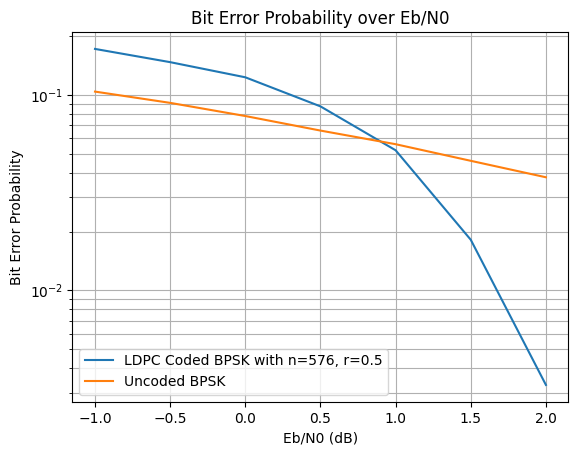

In [16]:
#Performance Evaluation
# Bit error probability
ldpc_bit_error_probabilities = ldpc_bit_error_counts / total_bits_counts
bpsk_bit_error_probabilities = bpsk_bit_error_counts / total_bits_counts

# Performance comparison
plt.yscale('log')
plt.plot(snrs_db, ldpc_bit_error_probabilities, label='LDPC Coded BPSK with n='+str(n)+', r='+str(r))
plt.plot(snrs_db, bpsk_bit_error_probabilities, label='Uncoded BPSK')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('Bit Error Probability')
plt.title('Bit Error Probability over Eb/N0')
plt.legend()
plt.grid(True, which="both")  # 메이저와 마이너 그리드 모두 표시
plt.show()

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/eval.png" />

# **Mission 2**
Encode an image of yourself and decode its noise corrupted version using the LDPC code

## **1. Data gathering**
Read the image (.jpg) to generate the original  data. Each pixel of the image is represented by 8-bits.

Used a **3 byte image**


*  Func **read_img(url)**:Get image array from url
*  Func **bits_to_image(bit_set,shape)**: Converts an image array to an image object.
*  Func **blocks_to_bit(blocks,bit_size)**: Convert image blocks into an image array.
*  Func **block_img(data, h)** : Converts an image array into image blocks.

In [21]:
def read_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    #if use 1byte to one pixel
    #Image.open().convert('L')
    image_array = np.array(img)
    return image_array

def bits_to_image(bit_set,shape):

    image_array = np.packbits(bit_set.astype(int)).reshape(shape)
    image = Image.fromarray(image_array)

    return image

def blocks_to_bit(blocks,bit_size):
    return blocks.flatten()[:bit_size]

def block_img(data, h):
    codeword_len = h.shape[0]
    data_len = len(data)

    num_blocks = data_len // codeword_len + (data_len % codeword_len != 0)  # 나머지가 있는 경우 1을 더해 마지막 블록 생성

    blocks = np.zeros([num_blocks, codeword_len])

    for i in range(num_blocks):
        start_idx = i * codeword_len
        end_idx = min((i + 1) * codeword_len, data_len)

        block = data[start_idx:end_idx]

        if len(block) < codeword_len:
            padding_len = codeword_len - len(block)
            block = np.concatenate((block, np.zeros(padding_len, dtype=int)))

        blocks[i] = block

    return blocks

# Photo shooting: Take a photo of yourself.
image_array = read_img('https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/input.jpg')
image_array = np.unpackbits(image_array)
#Data gathering: Read the image (.jpg) to generate the original data.
print(image_array.shape)


(1205904,)


## **2. Encoding and Decoding**
Choose a code rate 𝑅 and determine the parity check matrix 𝐇. Then, encode each information block through the efficient encoding procedure.

*  Func **ldpc_encode_image_blocks(image_blocks, h_matrix)**: Encode image blocks.
*  Func **noise_image_blocks(blocks, snr,r)**: Add noise to image blocks.
*  Func **ldpc_decode_image_blocks(encoded_blocks, h_matrix, snr,r)**: Decode image blocks.

In [19]:
def ldpc_encode_image_blocks(image_blocks, h_matrix):
    num_blocks = image_blocks.shape[0]
    block_len = h_matrix.shape[1]

    # NumPy 배열로 초기화
    encoded_blocks = np.zeros((num_blocks, block_len), dtype=np.float64)
    uncoded_blocks = np.zeros(image_blocks.shape, dtype=np.float64)

    for i in range(num_blocks):
        block = image_blocks[i]
        ldpc_codeword = encoding_data(block, h_matrix)
        ldpc_codeword = BPSK_modulation(ldpc_codeword)

        encoded_blocks[i] = ldpc_codeword
        uncoded_blocks[i] = BPSK_modulation(block)

    return encoded_blocks, uncoded_blocks

def noise_image_blocks(blocks, snr,r):
    var = 1/2 * 1/r * 1/snr
    num_blocks = blocks.shape[0]
    block_len = blocks.shape[1]

    # NumPy 배열로 초기화
    noised_blocks = np.zeros((num_blocks, block_len), dtype=np.float64)

    for i in range(num_blocks):
        block = blocks[i]
        signal_with_noise = add_awgn_noise(block, var)
        # NumPy 배열에 값 할당
        noised_blocks[i] = signal_with_noise

    return noised_blocks

def ldpc_decode_image_blocks(encoded_blocks, h_matrix, snr,r):
    var = 1/2 * 1/r * 1/snr
    num_blocks = encoded_blocks.shape[0]
    block_len = h_matrix.shape[0]
    decoded_result = np.zeros((num_blocks, block_len), dtype=np.float64)

    for i in range(num_blocks):
        decoded_output = decoding(encoded_blocks[i], h_matrix, var)
        decoded_result[i] = decoded_output[:block_len]

    return decoded_result

## Misson 2 Code

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/model2.png" />

In [22]:
%%time
# Photo shooting: Take a photo of yourself.
#Data gathering: Read the image (.jpg) to generate the original data.
image_array = read_img('https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/input.jpg')
img_shape = image_array.shape
img_bit = np.unpackbits(image_array)
n= 576
r= 1/2
k= int(n*r)

z, b_matrix  = get_base_matrix(n,r)
h_matrix = get_h_matrix(z, b_matrix)

#Information block segmentation: Split the original data into
#multiple information blocks, where each one is of length 𝑘.
img_blocks = block_img(img_bit,h_matrix)

#Demonstration: Show the original and the decoded images of yourself at low and high snr
snrs_db = np.arange(0, 3, 2)
snrs = snr_linear = 10 ** (snrs_db / 10)

uncoded_imgs=[]
decoded_imgs =[]

encoded_blocks, uncoded_blocks = ldpc_encode_image_blocks(img_blocks, h_matrix)

for idx, snr in enumerate(snrs):

    noised_blocks  = noise_image_blocks(encoded_blocks, snr, r)
    uncoded_noised = noise_image_blocks(uncoded_blocks, snr, 1)

    decoded_result = ldpc_decode_image_blocks(noised_blocks, h_matrix, snr, r)
    decoded_bits = blocks_to_bit(decoded_result,len(img_bit))
    decoded_img = bits_to_image(decoded_bits,img_shape)

    uncoded_result = np.array(uncoded_noised < 0, dtype=int)
    uncoded_bits = blocks_to_bit(uncoded_result,len(img_bit))
    uncoded_img = bits_to_image(uncoded_bits,img_shape)

    uncoded_imgs.append(uncoded_img)
    decoded_imgs.append(decoded_img)


CPU times: user 2min 3s, sys: 1min 41s, total: 3min 45s
Wall time: 2min 23s


## Misson 2 Result

* **Demonstration**: Show the original and the decoded images of yourself at low and high SNR, respectively. The SNR values depend on the code block size and the code rate.
* **Performance comparison**: Demonstrate the effect of the coding scheme by comparing the decoded image to the uncoded(received) one at low and high SNR, respectively.

In [26]:
#Performance comparison
display(bits_to_image(image_array,img_shape))

num_images = len(snrs)
fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))

for idx in range(num_images):
    # 원본 이미지 표시
    axes[idx, 0].imshow(uncoded_imgs[idx])
    axes[idx, 0].set_title(f"SNR: {snrs_db[idx]} - Uncoded Image")
    axes[idx, 0].axis('off')  # 축 표시 제거

    # 디코딩된 이미지 표시
    axes[idx, 1].imshow(decoded_imgs[idx])
    axes[idx, 1].set_title(f"SNR: {snrs_db[idx]} - LDPC Decoded Image with n="+str(n)+', r='+str(r) )
    axes[idx, 1].axis('off')  # 축 표시 제거

plt.suptitle("Comparison of Uncoded and Decoded Images at Different SNRs")
plt.show()

ValueError: ignored

**Mission 1 result**

<img src="https://raw.githubusercontent.com/smin-k/Digital-Communication-Systems/main/img/result1.png" />